<a href="https://colab.research.google.com/github/AnalyzrXs/Movie-Rating-Prediction/blob/main/movie_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/movie.csv", encoding='latin-1')

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
data.duplicated().sum()

np.int64(6)

In [ ]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [ ]:
missing_ratio = data.isnull().mean().sort_values(ascending=False)
print(missing_ratio)

Duration    0.533174
Rating      0.489393
Votes       0.489329
Actor 3     0.202721
Actor 2     0.153717
Genre       0.121027
Actor 1     0.104262
Year        0.034045
Director    0.033851
Name        0.000000
dtype: float64


In [ ]:
print(data['Duration'].unique()[:10])

[nan '109 min' '90 min' '110 min' '105 min' '147 min' '142 min' '59 min'
 '82 min' '116 min']


In [ ]:
import pandas as pd
import numpy as np
import re

def parse_duration(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).lower().strip()

    # Case: "120 min"
    if "min" in val and "h" not in val:
        match = re.findall(r'\d+', val)
        return int(match[0]) if match else np.nan

    # Case: "2h 30min", "2 hr 30 min"
    if "h" in val:
        h_match = re.search(r'(\d+)\s*h', val)
        m_match = re.search(r'(\d+)\s*min', val)
        hours = int(h_match.group(1)) if h_match else 0
        minutes = int(m_match.group(1)) if m_match else 0
        return hours * 60 + minutes

    # Case: "2:15" format
    if ":" in val:
        parts = val.split(":")
        if len(parts) == 2 and all(part.isdigit() for part in parts):
            return int(parts[0]) * 60 + int(parts[1])

    # Just digits (like "120")
    if val.isdigit():
        return int(val)

    return np.nan
# Replace all whitespace characters (space, tab, non-breaking space, etc.)
data['Duration'] = data['Duration'].astype(str).replace(r'\s+', '', regex=True)

data['Duration'] = data['Duration'].apply(parse_duration)


In [ ]:
data['Votes'] = data['Votes'].astype(str).replace({',': '', '\$': '', 'M': ''}, regex=True)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')


In [ ]:
print(train_df[num_cols].dtypes)
print(test_df[num_cols].dtypes)


Duration    float64
Votes       float64
Year        float64
dtype: object
Duration    float64
Votes        object
Year        float64
dtype: object


In [ ]:
print(train_df[num_cols].isnull().sum())
print(test_df[num_cols].isnull().sum())


Duration    7919
Votes          0
Year           0
dtype: int64
Duration    7590
Votes       7589
Year         528
dtype: int64


In [ ]:
print(f"Columns in train_df: {train_df.columns}")
print(f"Columns in test_df: {test_df.columns}")


Columns in train_df: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
Columns in test_df: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
train_df = data[data['Rating'].notnull()].copy()
test_df = data[data['Rating'].isnull()].copy()

In [ ]:
print("Missing values per numeric column:")
print(train_df[['Duration', 'Votes', 'Year']].isnull().sum())


Missing values per numeric column:
Duration    7919
Votes          0
Year           0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer

num_cols = ['Duration', 'Votes', 'Year']

valid_num_cols = [col for col in num_cols if train_df[col].notnull().sum() > 0]

print("Columns that will be imputed:", valid_num_cols)

knn_imputer = KNNImputer(n_neighbors=5)

train_imputed = knn_imputer.fit_transform(train_df[valid_num_cols])
train_df[valid_num_cols] = pd.DataFrame(train_imputed, columns=valid_num_cols, index=train_df.index)

test_imputed = knn_imputer.transform(test_df[valid_num_cols])
test_df[valid_num_cols] = pd.DataFrame(test_imputed, columns=valid_num_cols, index=test_df.index)


Columns that will be imputed: ['Votes', 'Year']


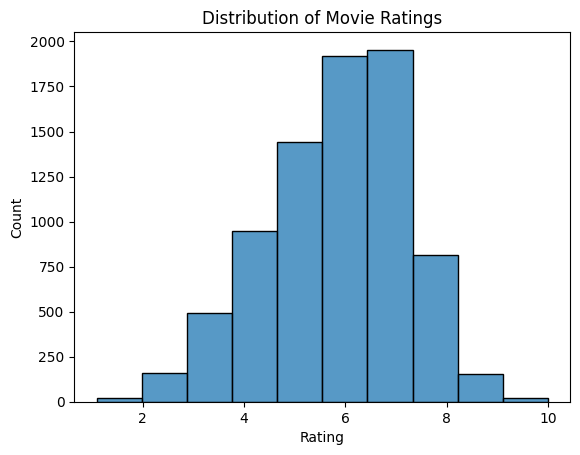

In [ ]:
sns.histplot(train_df['Rating'], bins=10)
plt.title('Distribution of Movie Ratings')
plt.show()


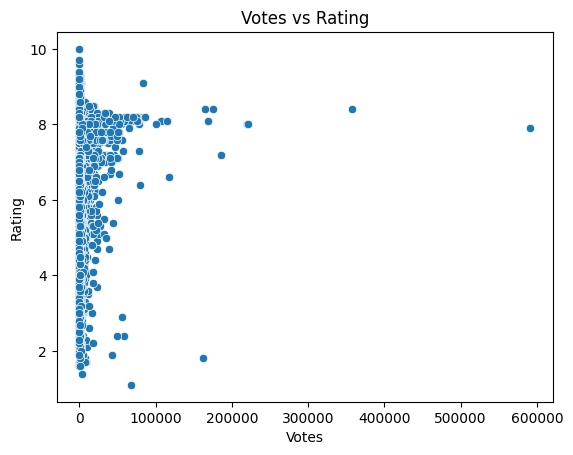

In [ ]:
# Ratings vs Votes
sns.scatterplot(data=train_df, x='Votes', y='Rating')
plt.title('Votes vs Rating')
plt.show()

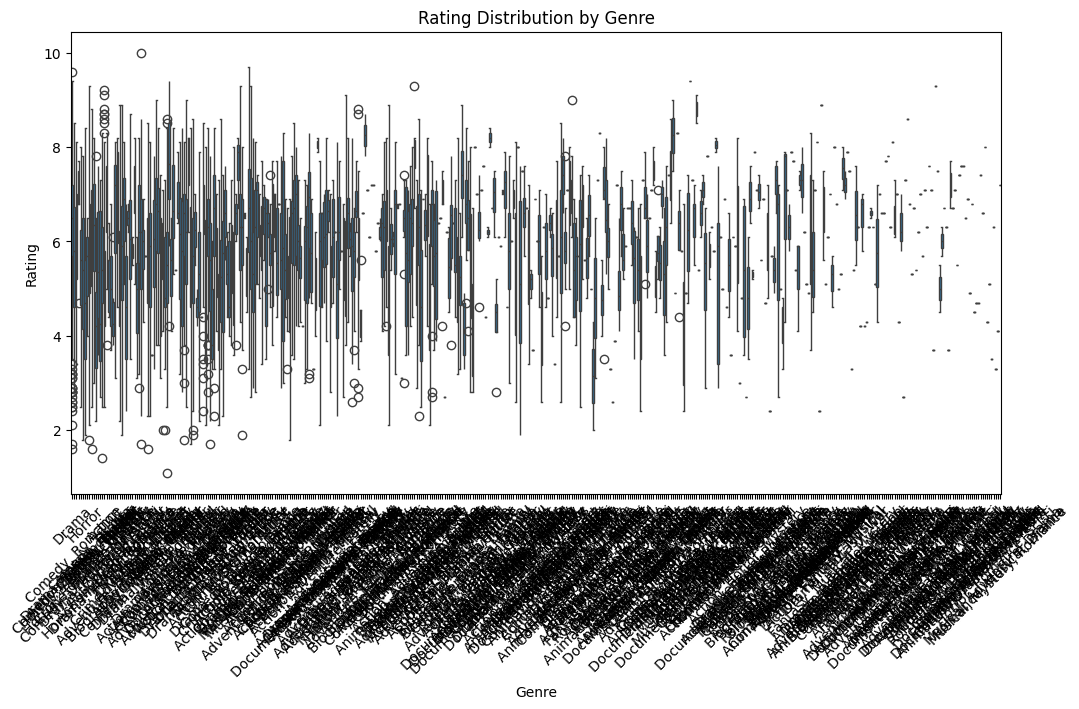

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Genre', y='Rating')
plt.xticks(rotation=45)
plt.title('Rating Distribution by Genre')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['Votes', 'Year', 'Genre', 'Director']
target = 'Rating'

# Split data
X = train_df[features]
y = train_df[target]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Votes', 'Year']
categorical_features = ['Genre', 'Director']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_valid)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_valid, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_valid, y_pred)))
print("R2 Score:", r2_score(y_valid, y_pred))


Mean Absolute Error: 0.8454781144781143
Root Mean Squared Error: 1.126897220299103
R2 Score: 0.3169455588179857


In [ ]:
mse = mean_squared_error(y_valid, y_best_pred)  # Calculate MSE first
rmse = np.sqrt(mse)  # Then take the square root to get RMSE

r2 = r2_score(y_valid, y_best_pred)

print("Tuned RMSE:", rmse)
print("Tuned R2:", r2)

Tuned RMSE: 1.1181300145456488
Tuned R2: 0.3275324760304794


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

features = ['Votes', 'Year']
X = pd.get_dummies(train_df[features + ['Genre']], drop_first=True)
y = train_df['Rating']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_valid)


In [ ]:
X_test = pd.get_dummies(test_df[features + ['Genre']], drop_first=True)

X_test = X_test.reindex(columns=X.columns, fill_value=0)

test_df['Predicted Rating'] = model.predict(X_test)


In [ ]:
test_df[['Name', 'Predicted Rating']].to_csv("predicted_movie_ratings.csv", index=False)


In [ ]:
features = ['Votes', 'Year', 'Genre', 'Director'] # include Director column in training
target = 'Rating'

# Split data
X = train_df[features]
y = train_df[target]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Votes', 'Year']
categorical_features = ['Genre', 'Director']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Votes', 'Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
sample_movie = pd.DataFrame({
    'Votes': [150000],
    'Year': [2023],
    'Genre': ['Action'],
    'Director': ['Christopher Nolan']
})


In [ ]:
predicted_rating = pipeline.predict(sample_movie)

print("🎬 Predicted Movie Rating:", round(predicted_rating[0], 2))


🎬 Predicted Movie Rating: 8.16
